In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [4]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(96,96))

Found 101965 images belonging to 2 classes.


In [5]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(96,96))

Found 20076 images belonging to 2 classes.


In [6]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (96,96))
        img = img / 255.0
        return img

In [7]:
model = Sequential()

pretrained_model= tf.keras.applications.DenseNet201(include_top=False,
                   input_shape= (96,96,3),
                   pooling='max',classes=2,
                   weights='imagenet')

model.add(pretrained_model)

In [9]:

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='elu'))

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 18,855,042
Trainable params: 18,625,986
Non-trainable params: 229,056
_________________________________________________________________


In [11]:

model.compile(optimizer=Adam(lr=3e-4),loss = 'hinge',metrics=['acc'])
history = model.fit(trainingdt,validation_data= testingdt,epochs=10,steps_per_epoch=100) 

C:\Users\viola\anaconda3\envs\keras_env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
100/100 [==============================] - 2914s 28s/step - loss: 0.6891 - acc: 0.7228 - val_loss: 0.5966 - val_acc: 0.7476
Epoch 2/10
100/100 [==============================] - 2609s 26s/step - loss: 0.5436 - acc: 0.7688 - val_loss: 0.5915 - val_acc: 0.7504
Epoch 3/10
100/100 [==============================] - 1454s 15s/step - loss: 0.5144 - acc: 0.7781 - val_loss: 0.5393 - val_acc: 0.7663
Epoch 4/10
100/100 [==============================] - 1318s 13s/step - loss: 0.4980 - acc: 0.7825 - val_loss: 0.6730 - val_acc: 0.7082
Epoch 5/10
100/100 [==============================] - 1289s 13s/step - loss: 0.5227 - acc: 0.7650 - val_loss: 0.5263 - val_acc: 0.7669
Epoch 6/10
100/100 [==============================] - 1351s 14s/step - loss: 0.5123 - acc: 0.7669 - val_loss: 0.5509 - val_acc: 0.7484
Epoch 7/10
100/100 [==============================] - 1364s 14s/step - loss: 0.4424 - acc: 0.8022 - val_loss: 0.6128 - val_acc: 0.7154
Epoch 8/10
100/100 [==============================] - 1

In [12]:
model.save('densenet201elu.h5')

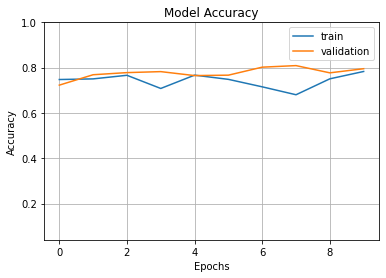

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

plt.axis(ymin=0.04,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [1]:
fig1 = plt.gcf()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.axis(ymin=1,ymax=0.5)
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

NameError: name 'plt' is not defined